In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv ('Churn/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.shape

(10000, 14)

In [3]:
print ("Number of Rows", df.shape[0])
print ("Number of Columns", df.shape[1])

Number of Rows 10000
Number of Columns 14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#drop irrelevant features
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
#encoding categorical data 
df['Geography'].unique ()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

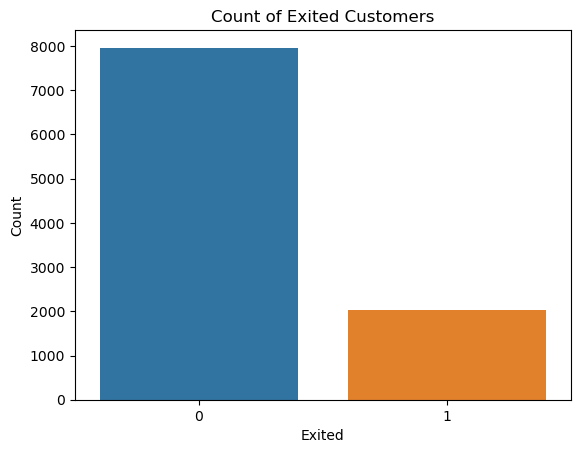

In [12]:
sns.countplot(x='Exited', data=df)

# Add labels and a title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited Customers')

# Show the plot
plt.show()

In [13]:
X = df.drop('Exited',axis=1)
y= df['Exited']

In [14]:
#handle imbalanced data 
from imblearn.over_sampling import SMOTE

In [15]:
X_res,y_res= SMOTE().fit_resample (X,y)

In [16]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [17]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, y_train, y_test=train_test_split (X_res,y_res,test_size = 0.20 , random_state = 40)

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
# Fit and transform the training data
X_train_scaled = sc.fit_transform(X_train)

# Transform the test data
X_test_scaled = sc.transform(X_test)

# Convert scaled data back to DataFrame to preserve feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


## Logistic Regression


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log = LogisticRegression ()

In [24]:
log.fit (X_train_scaled, y_train)

LogisticRegression()

In [25]:
# Make predictions on the test data
y_pred = log.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score 

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.21%


In [28]:
from sklearn.metrics import precision_score , recall_score, f1_score

In [29]:
precision_score  (y_test , y_pred)

0.7770820288040076

In [30]:
recall_score (y_test , y_pred)

0.7703289882060832

In [31]:
f1_score (y_test , y_pred)

0.7736907730673317

## SVC

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit (X_train_scaled,y_train)

SVC()

In [35]:
y_pred2 = svm.predict (X_test_scaled)

In [36]:
accuracy_score (y_test,y_pred2)

0.8396107972379159

In [37]:
precision_score  (y_test , y_pred2)

0.854381443298969

In [38]:
recall_score (y_test , y_pred2)

0.8230912476722533

In [39]:
f1_score (y_test , y_pred2)

0.838444514701233

## KNeighbours 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier ()

In [42]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [43]:
y_pred3 = knn.predict (X_test_scaled)

In [44]:
accuracy_score (y_test,y_pred3)

0.8273697426239799

In [45]:
precision_score  (y_test , y_pred3)

0.8305295950155763

In [46]:
recall_score (y_test , y_pred3)

0.8274363749224084

In [47]:
f1_score (y_test , y_pred3)

0.8289800995024875

## Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [51]:
y_pred4=dt.predict (X_test_scaled)

In [52]:
accuracy_score (y_test,y_pred4)

0.8013182674199624

In [53]:
precision_score  (y_test , y_pred4)

0.7963636363636364

In [54]:
recall_score (y_test , y_pred4)

0.8156424581005587

In [55]:
f1_score (y_test , y_pred4)

0.8058877644894205

## Random Forest Classifier 

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit (X_train_scaled, y_train)

RandomForestClassifier()

In [59]:
y_pred5=rf.predict (X_test_scaled)

In [60]:
accuracy_score (y_test,y_pred5)

0.871939736346516

In [61]:
precision_score  (y_test , y_pred5)

0.8838544990427568

In [62]:
recall_score (y_test , y_pred5)

0.8597144630664184

In [63]:
f1_score (y_test , y_pred5)

0.8716173694147262

## Gradient boosting classifier 

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc = GradientBoostingClassifier()

In [66]:
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [67]:
y_pred6= gbc.predict (X_test_scaled)

In [68]:
accuracy_score (y_test,y_pred6)

0.8443188951663528

In [69]:
precision_score  (y_test , y_pred6)

0.8562300319488818

In [70]:
recall_score (y_test , y_pred6)

0.8317815021725636

In [71]:
f1_score (y_test , y_pred6)

0.8438287153652393

In [72]:
final_data = pd.DataFrame ({'Models': ['LR','SCV','KNN','DT','RF','GBC'],'ACCURACY': [accuracy_score (y_test,y_pred),
                                                                                      accuracy_score (y_test,y_pred2),
                                                                                      accuracy_score (y_test,y_pred3),
                                                                                      accuracy_score (y_test,y_pred4),
                                                                                      accuracy_score (y_test,y_pred5),
                                                                                      accuracy_score (y_test,y_pred6)]})
final_data

,Models,ACCURACY
0,LR,0.772128
1,SCV,0.839611
2,KNN,0.827370
3,DT,0.801318
4,RF,0.871940
5,GBC,0.844319


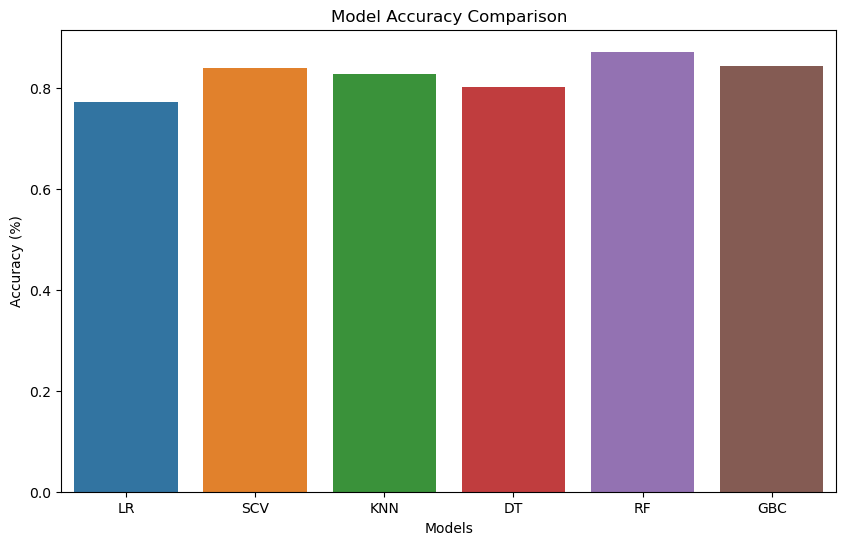

In [73]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='ACCURACY', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()

In [74]:
final_data2 = pd.DataFrame ({'Models': ['LR','SCV','KNN','DT','RF','GBC'],'PRECISION': [precision_score (y_test,y_pred),
                                                                                      precision_score (y_test,y_pred2),
                                                                                      precision_score (y_test,y_pred3),
                                                                                      precision_score (y_test,y_pred4),
                                                                                      precision_score (y_test,y_pred5),
                                                                                      precision_score (y_test,y_pred6)]})
final_data2

,Models,PRECISION
0,LR,0.777082
1,SCV,0.854381
2,KNN,0.830530
3,DT,0.796364
4,RF,0.883854
5,GBC,0.856230


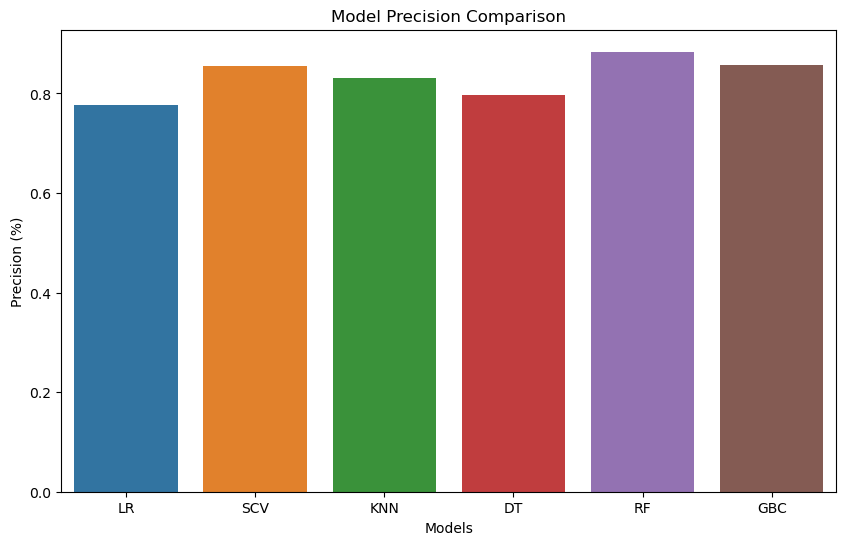

In [75]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='PRECISION', data=final_data2)
plt.xlabel('Models')
plt.ylabel('Precision (%)')
plt.title('Model Precision Comparison')
plt.show()

## Save Model 

In [76]:
X_res = sc.fit_transform (X_res)

In [77]:
rf.fit (X_res,y_res)

RandomForestClassifier()

In [78]:
import joblib

In [79]:
joblib.dump(rf, 'Churn_Prediction_Model')

['Churn_Prediction_Model']

In [82]:
# Save the scaler and model
model = joblib.load ('Churn_Prediction_Model')
joblib.dump(sc, 'scaler.pkl')
joblib.dump(model, 'Churn_Prediction_Model.pkl')

['Churn_Prediction_Model.pkl']

In [83]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

## GUI

In [ ]:
import tkinter as tk
import joblib
from sklearn.preprocessing import StandardScaler

# Load the scaler and model
sc = joblib.load('scaler.pkl')
model = joblib.load('Churn_Prediction_Model.pkl')

def show_entry_fields():
    try:
        # Getting values from entry fields and converting them to appropriate types
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = float(e8.get())
        p9 = int(e9.get())
        p10 = int(e10.get())

        # Encoding the 'Geography' field based on input value
        if p9 == 1:
            Geography_Germany = 1
            Geography_Spain = 0
            Geography_France = 0
        elif p9 == 2:
            Geography_Germany = 0
            Geography_Spain = 1
            Geography_France = 0
        elif p9 == 3:
            Geography_Germany = 0
            Geography_Spain = 0
            Geography_France = 1
        else:
            raise ValueError("Invalid value for Geography")

        # Preparing the feature vector
        features = [[p1, p2, p3, p4, p5, p6, p7, p8, Geography_Germany, Geography_Spain, Geography_France, p10]]

        # Scaling the feature vector
        features_scaled = sc.transform(features)

        # Making the prediction
        result = model.predict(features_scaled)

        # Showing the result
        if result == 0:
            print("The customer is not likely to churn.")
        else:
            print("The customer is likely to churn.")
    
    except ValueError as ve:
        print(f"Value Error: {ve}")
    except Exception as e:
        print(f"Error: {e}")

# Example setup for tkinter entry fields (assuming you have a Tkinter window setup)
root = tk.Tk()

tk.Label(root, text="CreditScore").grid(row=0)
tk.Label(root, text="Age").grid(row=1)
tk.Label(root, text="Tenure").grid(row=2)
tk.Label(root, text="Balance").grid(row=3)
tk.Label(root, text="NumOfProducts").grid(row=4)
tk.Label(root, text="HasCrCard").grid(row=5)
tk.Label(root, text="IsActiveMember").grid(row=6)
tk.Label(root, text="EstimatedSalary").grid(row=7)
tk.Label(root, text="Geography (1:Germany, 2:Spain, 3:France)").grid(row=8)
tk.Label(root, text="Gender").grid(row=9)


 
e1 = tk.Entry(root)
e2 = tk.Entry(root)
e3 = tk.Entry(root)
e4 = tk.Entry(root)
e5 = tk.Entry(root)
e6 = tk.Entry(root)
e7 = tk.Entry(root)
e8 = tk.Entry(root)
e9 = tk.Entry(root)
e10 = tk.Entry(root)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)
e7.grid(row=6, column=1)
e8.grid(row=7, column=1)
e9.grid(row=8, column=1)
e10.grid(row=9, column=1)

tk.Button(root, text='Predict', command=show_entry_fields).grid(row=10, column=1, sticky=tk.W, pady=4)

root.mainloop()


C:\Users\vuleg\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Value Error: X has 12 features, but StandardScaler is expecting 11 features as input.
